In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import imageio
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

In [25]:
os.chdir(r"C:\Users\Dazzyl\ML lreaning DEEP LEARN A-Z\ML\age\UTKFace") 


In [26]:
#im =Image.open('1_0_0_20161219140623097.jpg.chip.jpg').resize((128,128))
#im

In [27]:
onlyfiles = os.listdir()


In [28]:
len(onlyfiles)


23708

In [29]:
shuffle(onlyfiles)
age = [i.split('_')[0] for i in onlyfiles]

In [30]:
classes = []
for i in age:
    i = int(i)
    if i <= 14:
        classes.append(0)
    if (i>14) and (i<=25):
        classes.append(1)
    if (i>25) and (i<40):
        classes.append(2)
    if (i>=40) and (i<60):
        classes.append(3)
    if i>=60:
        classes.append(4)

In [31]:
X_data =[]
for file in onlyfiles:
    face = imageio.imread(file)
    face =cv2.resize(face, (32, 32) )
    X_data.append(face)

In [32]:
X = np.squeeze(X_data)


In [33]:
# normalize data
X = X.astype('float32')
X /= 255

In [34]:
classes[:10]


[3, 2, 1, 2, 1, 3, 0, 0, 2, 3]

In [35]:
categorical_labels = to_categorical(classes, num_classes=5)


In [36]:
categorical_labels[:10]


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [37]:
(x_train, y_train), (x_test, y_test) = (X[:15008],categorical_labels[:15008]) , (X[15008:] , categorical_labels[15008:])
(x_valid , y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])

In [38]:
len(x_train)+len(x_test) + len(x_valid) == len(X)

True

In [43]:

model = tf.keras.Sequential()


model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 

model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Dropout(rate = 0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(rate =  0.3))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units= 256, activation='relu'))

model.add(tf.keras.layers.Dropout(rate =0.5))

model.add(tf.keras.layers.Dense(units=5, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)             

In [44]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [45]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=25)

Train on 15008 samples
Epoch 1/25
15008/15008 [==============================] - 23s 2ms/sample - loss: 1.4588 - accuracy: 0.3912
Epoch 2/25
15008/15008 [==============================] - 1s 97us/sample - loss: 1.1966 - accuracy: 0.4991
Epoch 3/25
15008/15008 [==============================] - 1s 93us/sample - loss: 1.1012 - accuracy: 0.5306
Epoch 4/25
15008/15008 [==============================] - 1s 91us/sample - loss: 1.0570 - accuracy: 0.5508
Epoch 5/25
15008/15008 [==============================] - 1s 92us/sample - loss: 1.0325 - accuracy: 0.5582
Epoch 6/25
15008/15008 [==============================] - 1s 87us/sample - loss: 1.0133 - accuracy: 0.5644
Epoch 7/25
15008/15008 [==============================] - 1s 98us/sample - loss: 0.9951 - accuracy: 0.5670
Epoch 8/25
15008/15008 [==============================] - 1s 83us/sample - loss: 0.9787 - accuracy: 0.5788
Epoch 9/25
15008/15008 [==============================] - 1s 88us/sample - loss: 0.9642 - accuracy: 0.5796
Epoch 10/25
15

In [19]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.61235297


In [20]:
labels =["CHILD",  # index 0
        "YOUTH",      # index 1
        "ADULT",     # index 2 
        "MIDDLEAGE",        # index 3 
        "OLD",         # index 4
        ]

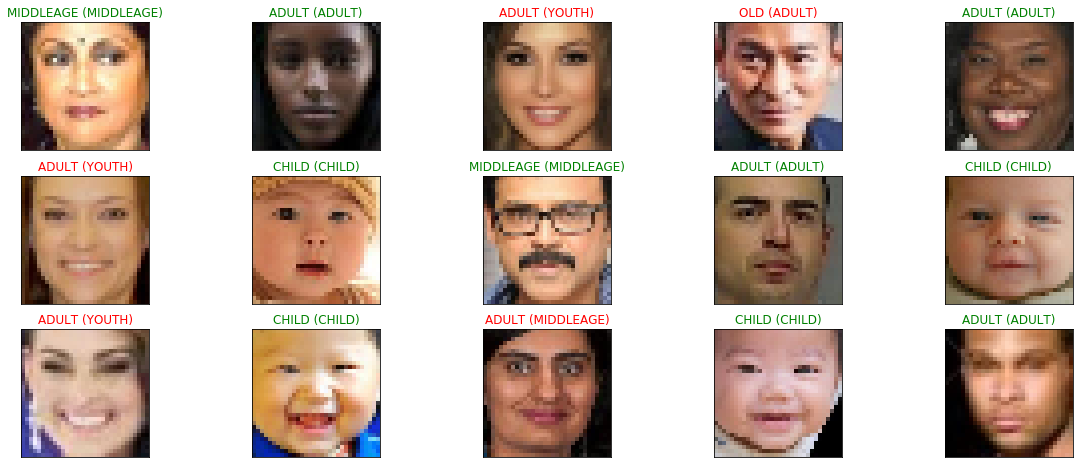

In [21]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()